In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
csv_path = "devices_v2.csv"

In [6]:
df = pd.read_csv(csv_path)

In [7]:
df.head()

,id,brand,name,type,network_technology,length,width,height,weight,resolution_l,...,sim_count,os_type,os_version,price,released_date,cpu_core,ram,internal_storage,fan_count,view_count
0,1,INFINIX,Infinix S3X,phone,4G,156.7,75.3,8.0,150.0,720.0,...,2.0,Android,8.1,NaN,2018.0,8.0,3GB,32GB,10,485
1,2,INFINIX,Infinix Note 5 Stylus,phone,4G,158.0,75.0,8.4,173.0,1080.0,...,2.0,Android,8.1,NaN,2018.0,8.0,4GB,32GB,31,524
2,3,INFINIX,Infinix Hot 6X,phone,4G,157.0,75.0,8.0,168.0,720.0,...,2.0,Android,8.1,NaN,2018.0,8.0,2GB,16GB,11,736
3,4,INFINIX,Infinix Smart 2 HD,phone,3G,156.9,76.5,8.2,165.0,720.0,...,2.0,Android,8.1,NaN,2018.0,8.0,1GB,16GB,1,335
4,5,INFINIX,Infinix Note 5,phone,4G,158.0,75.0,8.4,173.0,1080.0,...,2.0,Android,8.1,90.0,2018.0,8.0,3GB,32GB,35,871


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5709 entries, 0 to 5708
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5709 non-null   int64  
 1   brand               5709 non-null   object 
 2   name                5709 non-null   object 
 3   type                5709 non-null   object 
 4   network_technology  5709 non-null   object 
 5   length              5576 non-null   float64
 6   width               5576 non-null   float64
 7   height              5576 non-null   float64
 8   weight              5382 non-null   float64
 9   resolution_l        5321 non-null   float64
 10  resolution_w        5321 non-null   float64
 11  screen_body_ratio   4954 non-null   float64
 12  screen_size         4954 non-null   float64
 13  ppi                 5321 non-null   float64
 14  battery_type        5513 non-null   object 
 15  battery_capacity    5414 non-null   float64
 16  sim_ty

<h1 dir="rtl">
    ۱. آمار توصیفی
</h1>

<h2 dir="rtl">
    ۱.۱ توزیع دستگاههای تلفن همراه در بین فناوریهای مختلف شبکه چگونه است؟
</h2>

In [58]:
# 1) read date
cols = ["name", "type", "released_date","network_technology"]
df = pd.read_csv(csv_path, usecols=cols)

In [59]:
# 2) filtering by type and released_date
df = df[df["type"] == "phone"]
df = df[df["released_date"] > 2010]

In [60]:
# 3) Group the data by network technology and count the number of devices
grouped = df.groupby("network_technology").count()
# 4) Rename the column to "count"
grouped = grouped.rename(columns={"name": "count"})

In [61]:
# 5) Calculate the total number of devices
total = grouped["count"].sum()

In [62]:
# 6) Calculate the percentage of devices for each network technology
grouped["percentage"] = grouped["count"].apply(lambda x: x / total * 100)

In [63]:
# 7) Drop columns 'type' and 'released_date'
grouped = grouped.drop(['type', 'released_date'], axis=1)

In [64]:
# 8) Print the distribution
print(grouped)

                    count  percentage
network_technology                   
2G                    309    9.043020
3G                    887   25.958443
4G                   1817   53.175300
5G                    404   11.823237


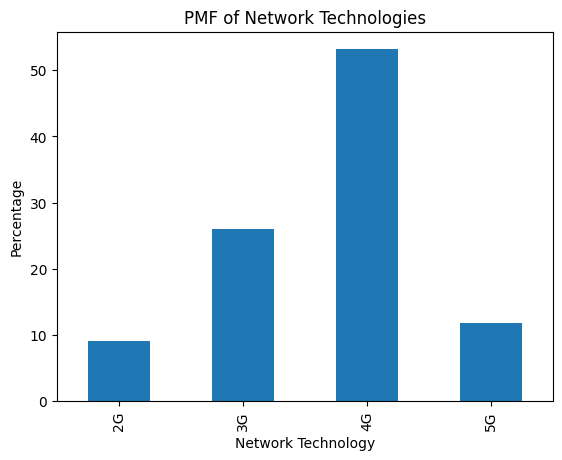

In [65]:
# 9) plot the distribution (pmf)
grouped['percentage'].plot(kind='bar')
# Add labels
plt.xlabel('Network Technology')
plt.ylabel('Percentage')
# Add title
plt.title('PMF of Network Technologies') 
# Display plot
plt.show()

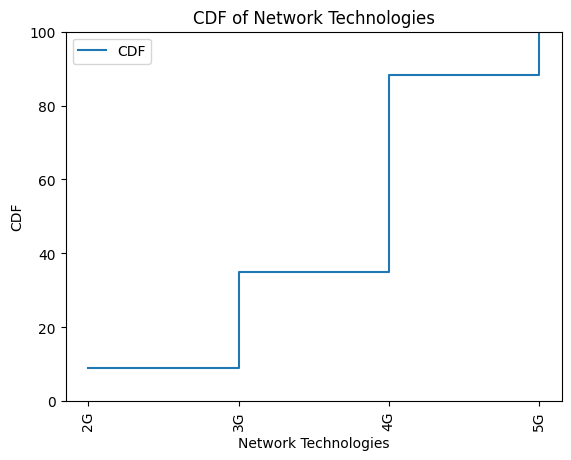

In [67]:
# 10) plot the distribution (cdf)
# Calculate cumulative sum of percentages
cdf = grouped['percentage'].cumsum()
# Create step function for CDF
x = cdf.index
y = cdf.values
# Plot CDF as a step function
plt.step(x, y, where='post', label='CDF')
# Customize plot
plt.ylabel('CDF')
plt.xlabel('Network Technologies')
plt.title('CDF of Network Technologies')
plt.xticks(x, grouped.index, rotation='vertical')
plt.legend()
plt.ylim([0, 100])
# Show the plot
plt.show()

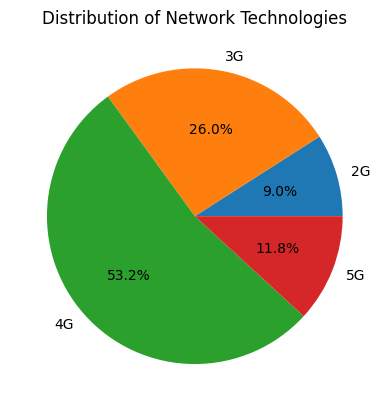

In [68]:
# 9) another plot ! 
# Plot a pie chart with labels and percentages
plt.pie(grouped['percentage'].values, labels=grouped['percentage'].index.values, autopct="%1.1f%%")
# Add a title
plt.title("Distribution of Network Technologies")
# Show the chart
plt.show()

<h2 dir="rtl">
    ۱.۲  ماتریس همبستگی میان ستونهای ابعاد، اندازه، وزن، پیکسل، نسبت صفحه به بدنه، حجم ورودی
باطری و ppi چگونه خواهد بود؟
</h2>

In [73]:
# 1) read date 
cols = [
     "type", "length", "width", "height", "weight","screen_size","screen_body_ratio", "battery_capacity", "ppi", "released_date"
]
df = pd.read_csv(csv_path, usecols=cols)

In [74]:
# 2) filtering by type and released_date
df = df[df["type"] == "phone"]
df = df[df["released_date"] > 2010]

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3417 entries, 0 to 5680
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               3417 non-null   object 
 1   length             3356 non-null   float64
 2   width              3356 non-null   float64
 3   height             3356 non-null   float64
 4   weight             3240 non-null   float64
 5   screen_body_ratio  3341 non-null   float64
 6   screen_size        3341 non-null   float64
 7   ppi                3402 non-null   float64
 8   battery_capacity   3374 non-null   float64
 9   released_date      3417 non-null   float64
dtypes: float64(9), object(1)
memory usage: 293.6+ KB


In [81]:
# 3) remove rows from df where a col has a null (NaN) => 246 rows will be omitted
df = df[df['ppi'].notna()]
df = df[df['length'].notna()]
df = df[df['width'].notna()]
df = df[df['height'].notna()]
df = df[df['height'].notna()]
df = df[df['battery_capacity'].notna()]
df = df[df['screen_size'].notna()]
df = df[df['screen_body_ratio'].notna()]
df = df[df['weight'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3171 entries, 0 to 5680
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               3171 non-null   object 
 1   length             3171 non-null   float64
 2   width              3171 non-null   float64
 3   height             3171 non-null   float64
 4   weight             3171 non-null   float64
 5   screen_body_ratio  3171 non-null   float64
 6   screen_size        3171 non-null   float64
 7   ppi                3171 non-null   float64
 8   battery_capacity   3171 non-null   float64
 9   released_date      3171 non-null   float64
dtypes: float64(9), object(1)
memory usage: 272.5+ KB


In [82]:
# 4) Drop columns 'type' and 'released_date'
df = df.drop(['type', 'released_date'], axis=1)

In [85]:
# 5) calcultae corr matrix
corr_matrix = df.corr()
print(corr_matrix)

                     length     width    height    weight  screen_body_ratio  \
length             1.000000  0.886607 -0.722016  0.626243           0.857545   
width              0.886607  1.000000 -0.750531  0.597393           0.849545   
height            -0.722016 -0.750531  1.000000 -0.401812          -0.770374   
weight             0.626243  0.597393 -0.401812  1.000000           0.611509   
screen_body_ratio  0.857545  0.849545 -0.770374  0.611509           1.000000   
screen_size        0.945747  0.905167 -0.759706  0.646430           0.971500   
ppi                0.658234  0.605421 -0.642053  0.472464           0.717093   
battery_capacity   0.876645  0.751623 -0.573128  0.616410           0.829311   

                   screen_size       ppi  battery_capacity  
length                0.945747  0.658234          0.876645  
width                 0.905167  0.605421          0.751623  
height               -0.759706 -0.642053         -0.573128  
weight                0.646430  0.4

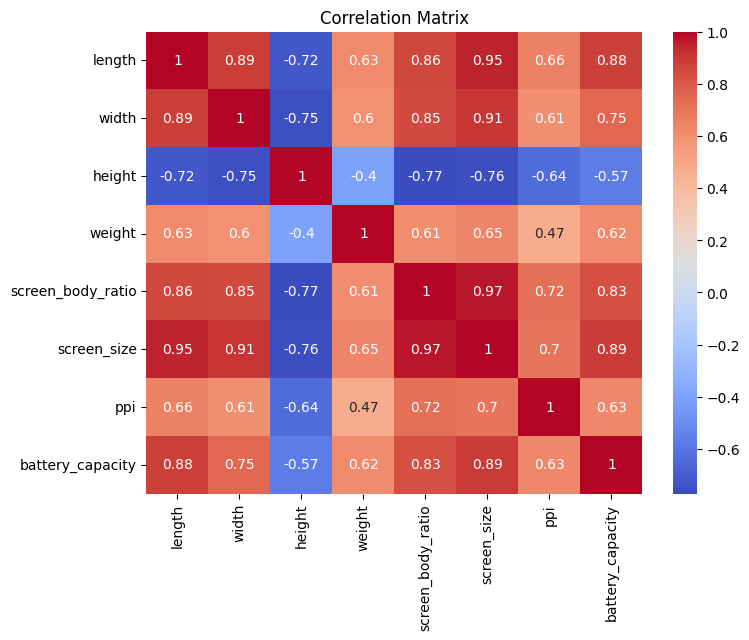

In [87]:
# 6) Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<h2 dir="rtl">
    ۱.۳  رایج ترین نوع سیم کارت مورد استفاده در دستگاههای تلفن همراه چیست؟
</h2>

In [89]:
# 1) read date 
cols = ["name", "type", "released_date", "sim_type"]
df = pd.read_csv(csv_path, usecols=cols)

In [90]:
# 2) filtering by type and released_date
df = df[df["type"] == "phone"]
df = df[df["released_date"] > 2010]

In [91]:
# 3) replace the NaN values with 'other' 
df['sim_type'].fillna('other', inplace=True)

In [92]:
# 4) Group the data by sim types and count the number of devices
grouped = df.groupby("sim_type").count()
# 5) Rename the column to "count"
grouped = grouped.rename(columns={"name": "count"})

In [93]:
# 6) Calculate the total number of devices
total = grouped["count"].sum()

In [94]:
# 7) Calculate the percentage of devices for each sim type
grouped["percentage"] = grouped["count"].apply(lambda x: x / total * 100)

In [95]:
# 8) Drop columns 'type' and 'released_date'
grouped = grouped.drop(['type', 'released_date'], axis=1)

In [96]:
# 9) Print the distribution
print(grouped)

          count  percentage
sim_type                   
micro       748   21.890547
mini        870   25.460931
nano       1684   49.282997
other       115    3.365525


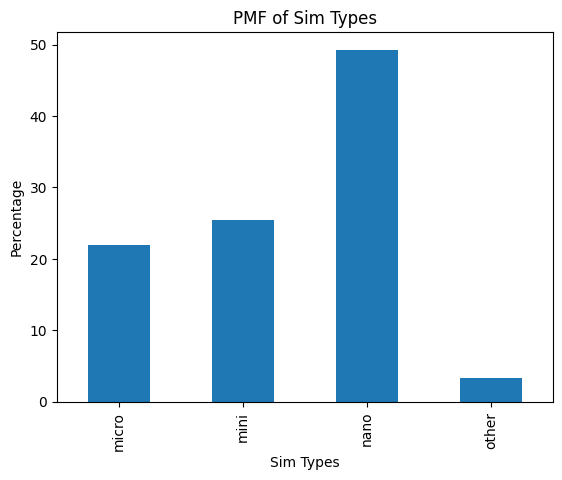

In [98]:
# 9) plot the distribution (pmf)
grouped['percentage'].plot(kind='bar')
# Add labels
plt.xlabel('Sim Types')
plt.ylabel('Percentage')
# Add title
plt.title('PMF of Sim Types') 
# Display plot
plt.show()

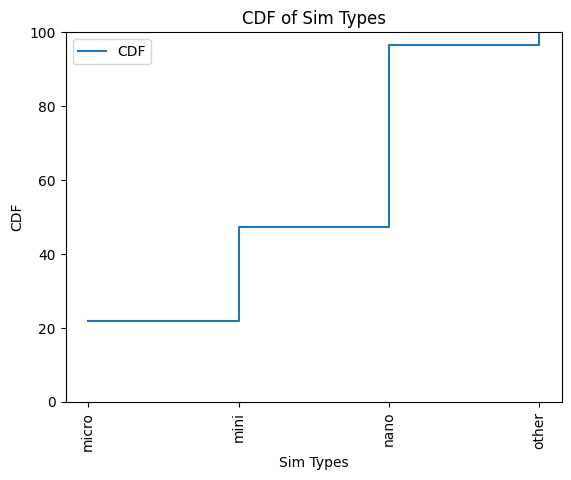

In [100]:
# 10) plot the distribution (cdf)
# Calculate cumulative sum of percentages
cdf = grouped['percentage'].cumsum()
# Create step function for CDF
x = cdf.index
y = cdf.values
# Plot CDF as a step function
plt.step(x, y, where='post', label='CDF')
# Customize plot
plt.ylabel('CDF')
plt.xlabel('Sim Types')
plt.title('CDF of Sim Types')
plt.xticks(x, grouped.index, rotation='vertical')
plt.legend()
plt.ylim([0, 100])
# Show the plot
plt.show()

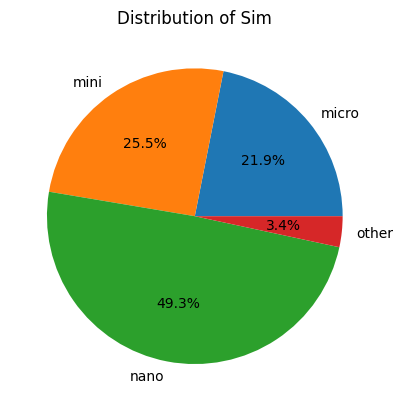

In [101]:
# 9) another plot ! 
# Plot a pie chart with labels and percentages
plt.pie(grouped['percentage'].values, labels=grouped['percentage'].index.values, autopct="%1.1f%%")
# Add a title
plt.title("Distribution of Sim")
# Show the chart
plt.show()

<h2 dir="rtl">
    ۱.۴  ده ورژن برتر اندروید از نظر تکرار استفاده در گوشیهای مختلف.
</h2>

In [125]:
# 1) read date 
df = pd.read_csv("gsmarena_data.csv", usecols=["name", "os_type", "os_version"])

In [126]:
# 2) Select the rows whose os_type is Android
df = df[df['os_type'] == 'Android']

In [128]:
# 3) standardize versions
def standardize_version(version):
    arr = version.split(".")
    if len(arr) == 3:
        if arr[1] == '0' and arr[2] == '0':
            return arr[0]
        if arr[1] != '0' and arr[2] == '0':
            return arr[0] + '.' + arr[1]
        else:
            return version
    elif len(arr) == 2:
        if arr[1] == '0' or arr[1] == '':
            return arr[0]
        else:
            return version
    elif len(arr) == 1:
        return version
        
df['os_version'] = df['os_version'].apply(standardize_version)

In [138]:
# 4) Group the data by Android version and count the number of phone models
grouped = df[["name", "os_version"]].groupby("os_version").count()
# Rename the column to "count"
grouped = grouped.rename(columns={"name": "count"})

In [140]:
# 5) Sort the data by the count in descending order and select the top ten rows
top_ten = grouped.sort_values(by="count", ascending=False).head(10)

In [141]:
# 6) Print the result
print(top_ten)

            count
os_version       
10            315
11            262
9             238
4.4.2         236
12            181
6             179
8.1           132
13            130
7             119
2.3           119


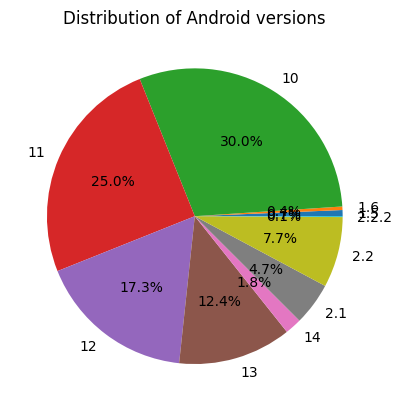

In [153]:
# 7) plot the result 
# Plot a pie chart with labels and percentages
grouped["percentage"] = grouped["count"].apply(lambda x: x / total * 100)
plt.pie(grouped['percentage'].values[:10], labels=grouped['percentage'].index.values[:10], autopct="%1.1f%%")
# Add a title
plt.title("Distribution of Android versions")
# Show the chart
plt.show()

<h2 dir="rtl">
    ۱.۶  توزیع گوشیها بر حسب برند را رسم کنید.
</h2>

In [148]:
# 1) read date 
df = pd.read_csv("gsmarena_data.csv", usecols=["name", "brand"])

In [154]:
# 2) Group the data by brand and count the number of devices
grouped = df.groupby("brand").count()
# 3) Rename the column to "count"
grouped = grouped.rename(columns={"name": "count"})

In [156]:
# 4) Calculate the total number of devices
total = grouped["count"].sum()

In [157]:
# 5) Calculate the percentage of devices for each network technology
grouped["percentage"] = grouped["count"].apply(lambda x: x / total * 100)

In [158]:
# 6) Print the distribution
print(grouped)

         count  percentage
brand                     
ALCATEL    409    7.164127
APPLE      118    2.066912
ASUS       200    3.503240
BLU        368    6.445963
HTC        287    5.027150
HUAWEI     441    7.724645
INFINIX    125    2.189525
LENOVO     246    4.308986
LG         666   11.665791
NOKIA      575   10.071816
SAMSUNG   1374   24.067262
SONY       158    2.767560
XIAOMI     376    6.586092
ZTE        366    6.410930


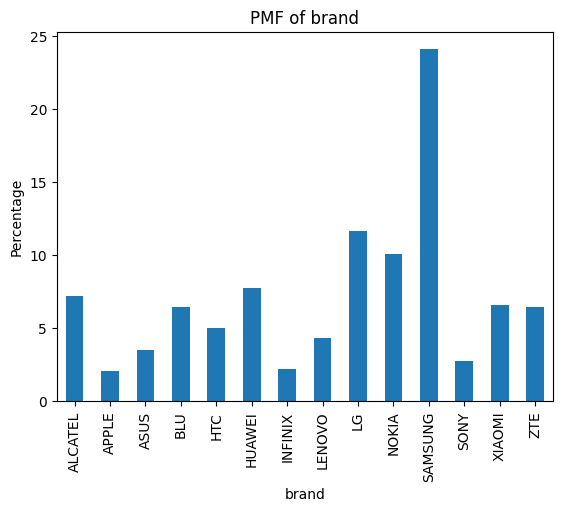

In [160]:
# 7) plot the distribution (pmf)
grouped['percentage'].plot(kind='bar')
# Add labels
plt.xlabel('brand')
plt.ylabel('Percentage')
# Add title
plt.title('PMF of brand') 
# Display plot
plt.show()

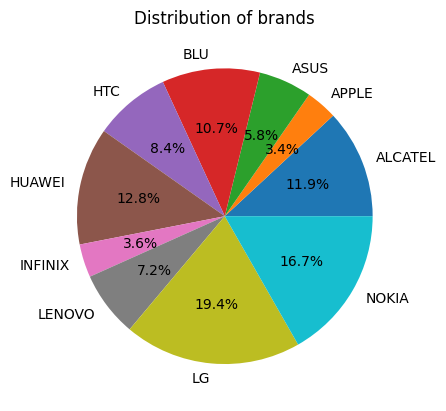

In [162]:
# 6) plot the result 
# Plot a pie chart with labels and percentages
grouped["percentage"] = grouped["count"].apply(lambda x: x / total * 100)
plt.pie(grouped['percentage'].values[:10], labels=grouped['percentage'].index.values[:10], autopct="%1.1f%%")
# Add a title
plt.title("Distribution of brands")
# Show the chart
plt.show()

<h2 dir="rtl">
    ۱.۷  اسکتر پلات density ppi را بر اساس سال برای سه برند سامسونگ، اپل و شیائومی رسم کنید، آیا
روند خاصی در آن دیده میشود؟
</h2>

In [120]:
# 1) read date 
cols = ["type", "released_date", "brand", "ppi"]
df = pd.read_csv(csv_path, usecols=cols)

In [121]:
# 2) filtering by type and released_date
df = df[df["type"] == "phone"]
df = df[df["released_date"] > 2010]

In [122]:
# 3) remove rows from df where a col has a null (NaN) => 15 rows will be omitted
df = df[df['ppi'].notna()]

In [124]:
# 4) Filter the DataFrame to include only the desired brands
brands = ["APPLE", "SAMSUNG", "XIAOMI"]
df = df[df['brand'].isin(brands)]

In [125]:
# 5) Drop columns 'type' 
df = df.drop(['type'], axis=1)

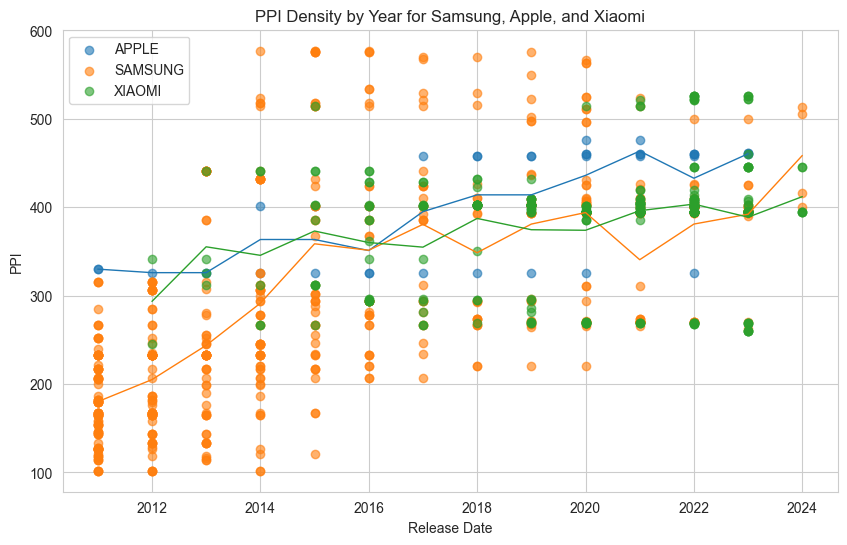

In [137]:
# 6) Prepare the data for plotting
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Calculate the mean PPI for each brand and year
mean_ppi = df.groupby(['brand', df['released_date']]).mean().reset_index()[['brand', 'released_date', 'ppi']]

# Loop through each brand and plot a scatter plot
for brand in brands:
    brand_df = df[df['brand'] == brand]
    plt.scatter(brand_df['released_date'], brand_df['ppi'], label=brand, alpha=0.6)
    
    brand_mean = mean_ppi[mean_ppi['brand'] == brand]
    brand_mean = brand_mean.sort_values('released_date')
    plt.plot(brand_mean['released_date'], brand_mean['ppi'], linestyle='-', linewidth=1)
    
# Add labels and title
plt.xlabel('Release Date')
plt.ylabel('PPI')
plt.title('PPI Density by Year for Samsung, Apple, and Xiaomi')

# Add a legend
plt.legend()

# Display the plot
plt.show()

<p dir="rtl">
    اگر روند صعودی یا نزولی واضحی در طول زمان وجود داشته باشد، ممکن است نشان دهنده این باشد که برند به طور مداوم در حال افزایش یا کاهش تراکم PPI در دستگاه های خود است.
</p>
<p dir="rtl">
   اگر نقاط داده پراکنده تر باشند و از یک الگوی واضح پیروی نکنند، ممکن است نشان دهد که هیچ روند ثابتی در تراکم PPI برای آن برند وجود ندارد.
</p>

<h1 dir="rtl">
    ۲. تخمین
</h1>

<h2 dir="rtl">
    ۲.۱ میانگین قیمت محصولات سال ۲۰۲۳ برندهای اپل، سامسونگ، هواوی، شیائومی و نوکیا را به دست
آورید. طبق این نمونه برداری بازه ی اطمینان ۹۸ درصد را برای قیمت گوشی در سال ۲۰۲۳ محاسبه نمایید.
</h2>

In [246]:
# 1) read date 
cols = ["type", "released_date", "brand", "price"]
df = pd.read_csv(csv_path, usecols=cols)

In [247]:
# 2) filtering by type and released_date
brands = ['APPLE', 'SAMSUNG', 'HUAWEI', 'XIAOMI', 'NOKIA']
df = df[(df['type'] == "phone") & (df['brand'].isin(brands)) & (df['released_date'] == 2023)]

In [248]:
# 3) remove rows from df where a col has a null (NaN) => 2 rows will be omitted
df = df[df['price'].notna()]

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 602 to 5022
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          106 non-null    object 
 1   type           106 non-null    object 
 2   price          106 non-null    float64
 3   released_date  106 non-null    float64
dtypes: float64(2), object(2)
memory usage: 4.1+ KB


In [250]:
# 4) Calculate the average price for each brand.
average_prices = df.groupby('brand')['price'].mean()

In [251]:
average_prices # !!!!!!!

brand
APPLE         929.070000
HUAWEI        557.742857
NOKIA         158.676000
SAMSUNG    352020.286364
XIAOMI     149659.730769
Name: price, dtype: float64

In [252]:
df[df["brand"] == "SAMSUNG"]

,brand,type,price,released_date
3440,SAMSUNG,phone,266.76,2023.0
3441,SAMSUNG,phone,182.52,2023.0
3442,SAMSUNG,phone,216.00,2023.0
3445,SAMSUNG,phone,571.32,2023.0
3448,SAMSUNG,phone,150.12,2023.0
3449,SAMSUNG,phone,137.16,2023.0
3450,SAMSUNG,phone,1516820.77,2023.0
3452,SAMSUNG,phone,559.44,2023.0
3458,SAMSUNG,phone,1427590.77,2023.0
3459,SAMSUNG,phone,2105828.00,2023.0


In [253]:
# 5) Calculate the overall average price across all brands.
overall_mean_price = df['price'].mean()
overall_mean_price

128299.79433962263

In [254]:
# 6) Calculate the sample standard deviation.
sample_std_dev = df['price'].std()
sample_std_dev

375495.26899602654

In [255]:
# 7) Calculate the 98% confidence interval for the price of phones in 2023.
n = df.shape[0]  # Number of observations
z_score = 2.326  # Z-score for 98% confidence level (two-tailed)

margin_of_error = z_score * (sample_std_dev / np.sqrt(n))
lower_bound = overall_mean_price - margin_of_error
upper_bound = overall_mean_price + margin_of_error
print(f"\n98% Confidence Interval for the price of phones in 2023: ({lower_bound:.2f}, {upper_bound:.2f})")


98% Confidence Interval for the price of phones in 2023: (43467.49, 213132.10)


In [256]:
# Function to calculate the Modified Z-score
def modified_z_score(data):
    median_price = data['price'].median()
    mad = abs(data['price'] - median_price).median()
    modified_z_score = 0.6745 * (data['price'] - median_price) / mad
    return modified_z_score

In [257]:
# Loop through each brand and detect and replace outliers
for brand in ["SAMSUNG", "XIAOMI"]:
    brand_df = df[df['brand'] == brand].copy() 
    
    # Calculate the Modified Z-score for the 'price' column
    brand_df['modified_z_score'] = modified_z_score(brand_df)
    
    # Detect and replace outliers based on the Modified Z-score
    threshold = 3.5  # Adjust the threshold as needed
    brand_df.loc[abs(brand_df['modified_z_score']) > threshold, 'price'] = brand_df['price'].median()
    
    # Update the original DataFrame with the modified 'price' values
    df.loc[df['brand'] == brand, 'price'] = brand_df['price']

In [261]:
average_prices = df.groupby('brand')['price'].mean()
average_prices

brand
APPLE      929.070000
HUAWEI     557.742857
NOKIA      158.676000
SAMSUNG    312.067273
XIAOMI     329.637949
Name: price, dtype: float64

In [262]:
overall_mean_price = df['price'].mean()
overall_mean_price

361.5449056603773

In [263]:
sample_std_dev = df['price'].std()
sample_std_dev

279.9145922913096

In [264]:
# 7) Calculate the 98% confidence interval for the price of phones in 2023.
n = df.shape[0]  # Number of observations
z_score = 2.326  # Z-score for 98% confidence level (two-tailed)

margin_of_error = z_score * (sample_std_dev / np.sqrt(n))
lower_bound = overall_mean_price - margin_of_error
upper_bound = overall_mean_price + margin_of_error
print(f"\n98% Confidence Interval for the price of phones in 2023: ({lower_bound:.2f}, {upper_bound:.2f})")


98% Confidence Interval for the price of phones in 2023: (298.31, 424.78)


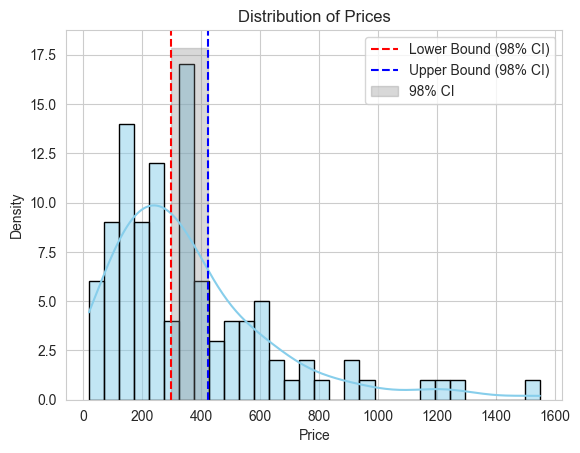

In [274]:
# Create a KDE plot
sns.histplot(data=df, x='price', bins=30, kde=True, color='skyblue', edgecolor='black')

# Plot vertical lines for the bounds
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound (98% CI)')
plt.axvline(upper_bound, color='blue', linestyle='--', label='Upper Bound (98% CI)')

# Alternatively, you can shade the area between the bounds
plt.fill_betweenx(y=[0, plt.gca().get_ylim()[1]], x1=lower_bound, x2=upper_bound, color='gray', alpha=0.3, label='98% CI')
# Add labels and title
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Distribution of Prices')
# Add legend
plt.legend()
# Display the plot
plt.show()